K-Means and Gaussian Mixture Model (GMM) are unsupervised clustering techniques. K-Means groups data points using distance from the cluster centroid.
GMM uses a probabilistic assignment of data points to clusters. Each cluster is described by a separate Gaussian distribution.

Although KMeans is the popular clustering technique. GMs usually tend to be slower than K-Means because it takes more iterations of the EM algorithm to reach the convergence.

GMs are somewhat more flexible and with a covariance matrix we can make the boundaries elliptical, as opposed to circular boundaries with K-means.

In [1]:
# import the Kmeans function from the scikit learn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

##Generate 400 samples of simple blobs of data importing make_blob from sklearn
from sklearn.datasets import make_blobs


In [2]:
#generate data
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

# define the standard devation
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
# generate the blobs
X, y = make_blobs(n_samples=400, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)
print(X[5])
print(y[5])

[-2.76092732  1.65587925]
2


# Build the model - KMeans

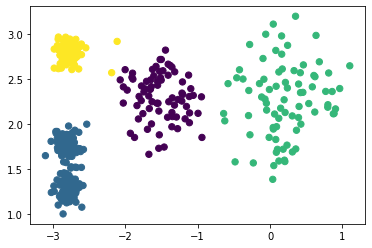

In [3]:
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# Visualize the KMeans clusters

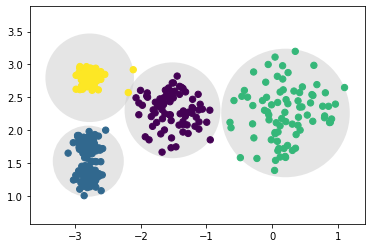

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
                                
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred = kmeans.fit_predict(X)
plot_kmeans(kmeans, X)     


In [5]:
# Fit predict 
y_pred = kmeans.fit_predict(X)
print(y_pred)

[1 0 3 1 2 1 1 1 2 1 1 1 1 1 0 3 2 1 1 3 3 3 0 3 1 0 1 2 1 0 1 0 2 1 0 1 2
 3 0 0 3 1 1 2 1 2 0 1 1 0 1 1 0 1 1 0 1 3 3 1 0 1 2 1 3 3 3 0 1 1 1 1 2 1
 1 1 0 3 1 3 3 1 2 3 1 2 3 0 1 3 0 3 1 1 2 3 3 2 3 1 2 3 1 1 1 2 0 2 0 1 1
 1 2 2 1 1 1 0 2 3 2 0 1 1 0 1 1 2 0 1 1 2 1 1 2 1 3 3 1 2 1 1 2 1 2 0 1 1
 1 2 1 3 0 3 1 3 2 0 2 1 1 2 1 2 3 1 1 1 1 3 0 1 0 0 1 1 2 3 3 1 2 3 2 1 0
 1 3 0 3 1 1 1 3 2 2 3 1 1 1 0 1 0 1 3 2 1 1 1 2 1 3 1 2 1 3 2 0 1 2 1 2 3
 2 0 2 1 1 1 0 2 1 0 3 0 3 3 1 0 1 1 2 1 0 1 0 0 1 0 1 3 1 0 0 3 1 1 2 2 1
 2 2 1 2 1 0 1 1 2 0 1 0 3 2 0 2 3 3 1 0 3 1 1 2 0 2 1 0 0 2 2 1 0 3 1 3 3
 3 3 1 3 1 3 0 1 2 2 0 0 2 3 0 0 2 0 0 0 0 1 1 3 2 3 3 1 0 2 3 3 1 1 3 3 0
 0 2 1 1 1 2 1 1 3 1 3 3 2 3 2 3 0 0 1 2 1 0 3 2 2 3 3 0 0 1 1 3 3 2 3 0 2
 1 1 3 2 1 2 2 3 1 1 3 1 2 0 1 2 0 2 1 1 3 0 0 1 2 1 1 1 1 1]


# Transform the data

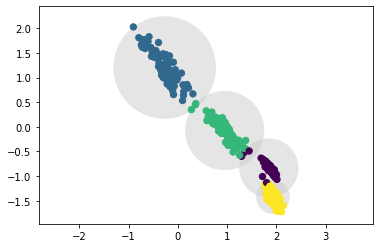

In [6]:
##Take the same data and transform it into oblong/elliptical clusters using K-Means and plot_kmeans()
#transformation = [[0.6, -0.6], [0, 0]]
#X_stretched = np.dot(X, transformation)
#kmeans = KMeans(n_clusters=4, random_state=0)
#plot_kmeans(kmeans, X_stretched) 


rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)   

# What is your observation?
transformed clusters are non-circular and overlapping

# GaussianMixture

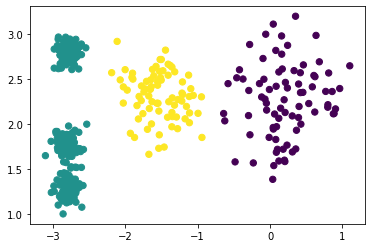

In [7]:
##Use Gaussian mixture model to visualize the points in the same manner as K-means
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40)


In [8]:
##Using predict_proba() retrun a matrix size (n_samples x n_clusters) that measure the
##probability that any point belongs to the given cluster
probs = gmm.predict_proba(X)

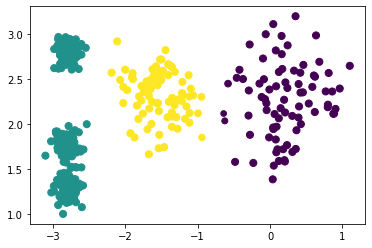

In [9]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size); 

In [10]:
#Let's create a function that will help us visualize the locations and shapes of the GMM 
#clusters by drawing ellipses based on the GMM output:

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        

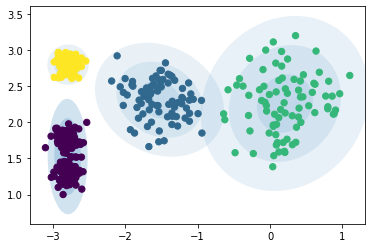

In [11]:
#Original        
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

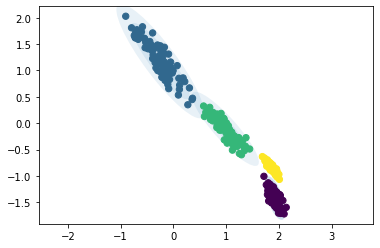

In [12]:
#Stretched and non-overlapping
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)
